In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
db_house_price = pd.read_csv(f'/content/Preços_de_casas.csv')
db_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [ ]:
db_new_house_price = pd.read_csv(f'/content/Novas_casas.csv', sep=';')
db_new_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Casa                            10 non-null     int64
 1   area_primeiro_andar             10 non-null     int64
 2   existe_segundo_andar            10 non-null     int64
 3   quantidade_banheiros            10 non-null     int64
 4   qualidade_da_cozinha_Excelente  10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes


#Relações

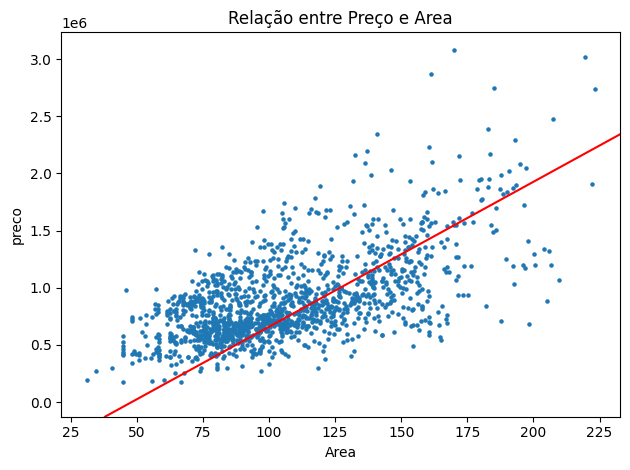

In [ ]:
plt.scatter(db_house_price['area_primeiro_andar'], db_house_price['preco_de_venda'], s=5)
plt.axline(xy1=(50,25000), xy2=(190,1800000), color='red')

plt.title('Relação entre Preço e Area', fontsize=12)
plt.xlabel('Area', fontsize=10)
plt.ylabel('preco', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
px.scatter(db_house_price, x='area_primeiro_andar',y='preco_de_venda', trendline_color_override='red', trendline='ols')

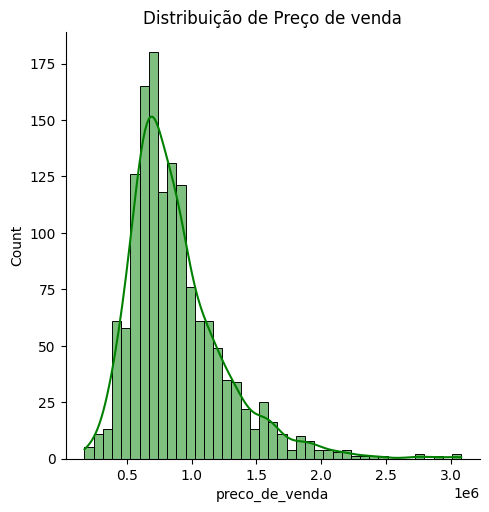

In [ ]:
sns.displot(db_house_price['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição de Preço de venda')
plt.show()

#Treino e Teste

In [ ]:
db_house_price=db_house_price.drop(columns='Id')

x = db_house_price.drop(columns='preco_de_venda')
y = db_house_price['preco_de_venda']

In [ ]:
random_seed = 230

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_seed)

df_train = pd.DataFrame(data=X_train)
df_train['preco_de_venda'] = y_train

In [ ]:
modelo_0 = ols('preco_de_venda ~area_primeiro_andar', data=df_train).fit()
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Tue, 08 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        00:17:32   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

In [ ]:
print(f'O R² do modelo é: {modelo_0.rsquared:.4f}')

O R² do modelo é: 0.3773


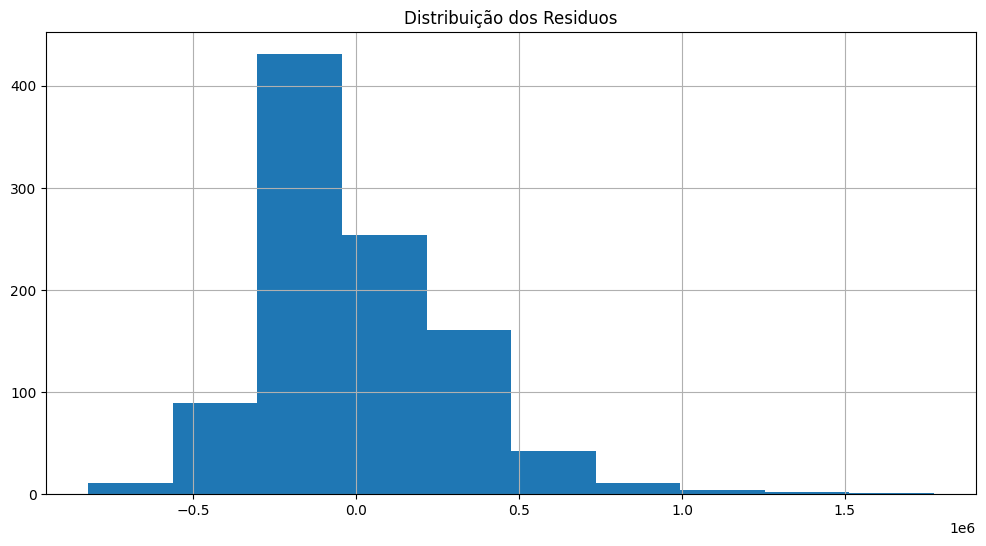

In [ ]:
modelo_0.resid.hist(figsize=(12,6))
plt.title("Distribuição dos Residuos")
plt.show()

In [ ]:
y_predict = modelo_0.predict(X_test)

print(f'R²: {r2_score(y_test,y_predict):.4f}')

R²: 0.3853


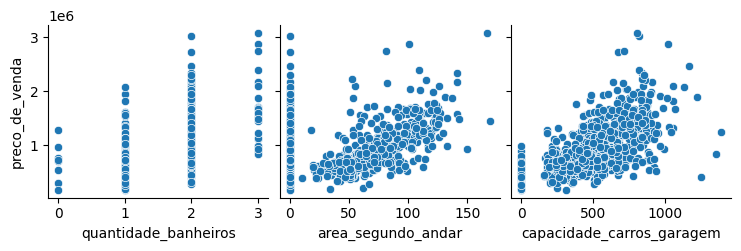

In [ ]:
sns.pairplot(db_house_price, y_vars='preco_de_venda', x_vars=['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

#Adicionando fatores no modelo

In [ ]:
X_train

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
1303,65.7732,0,0.0000,1,0,0
326,55.3684,1,55.3684,1,189,0
386,74.6916,1,107.4853,2,560,0
615,103.6764,0,0.0000,1,440,0
236,94.2006,1,67.8170,2,457,0
...,...,...,...,...,...,...
777,104.6983,1,82.3094,2,455,0
271,151.6128,0,0.0000,2,338,0
723,83.7029,1,83.6100,2,800,0
560,160.5312,0,0.0000,2,576,0


In [ ]:
X_train = sm.add_constant(X_train)

modelo_1 = sm.OLS(y_train,X_train[['const','area_primeiro_andar','existe_segundo_andar','quantidade_banheiros','qualidade_da_cozinha_Excelente']]).fit()

print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Tue, 08 Jul 2025   Prob (F-statistic):          4.15e-227
Time:                        00:17:33   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
forecast_price_house = modelo_1.predict(X_test[['const','area_primeiro_andar','existe_segundo_andar','quantidade_banheiros','qualidade_da_cozinha_Excelente']])

print(f'R²: {modelo_1.rsquared:.4f} | R² {r2_score(y_test, forecast_price_house):.4f}')

#Quanto mais parecido, melhor

R²: 0.6511 | R² 0.6432


In [ ]:
novo_imovel = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[120],
                            'existe_segundo_andar': [1],
                            'quantidade_banheiros': [2],
                            'qualidade_da_cozinha_Excelente': [0]
                            })

print(f'{modelo_1.predict(novo_imovel)[0]:.2f}')

1123758.24


In [ ]:
db_new_house_price = db_new_house_price.drop(columns=['Casa'])
db_new_house_price = sm.add_constant(db_new_house_price)


In [ ]:
forecast_new_houses = modelo_1.predict(db_new_house_price)
forecast_new_houses

,0
0,1.751739e+06
1,1.863058e+06
2,1.568149e+06
3,2.206758e+06
4,1.591629e+06
5,1.246151e+06
6,1.357470e+06
7,1.552134e+06
8,9.636478e+05
9,1.639974e+06


#Salvando e carregando o modelo

In [ ]:
nome_arquivo = 'modelo_regressao_linear.pkl'

# Salvar o modelo em um arquivo usando pickle
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo_1, arquivo)

In [ ]:
with open(nome_arquivo, 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

In [ ]:
print(modelo_carregado.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Tue, 08 Jul 2025   Prob (F-statistic):          4.15e-227
Time:                        00:18:30   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
variaveis_explicativas = ['const','area_primeiro_andar','existe_segundo_andar','quantidade_banheiros','qualidade_da_cozinha_Excelente']

vif_1 = pd.DataFrame()
vif_1['variavel'] = variaveis_explicativas

vif_1['vif'] = [variance_inflation_factor(X_train[variaveis_explicativas], i) for i in range(len(variaveis_explicativas))]

In [ ]:
vif_1

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795
